In [1]:
import  numpy as np 
import pandas as pd 
import matplotlib.pyplot as  plt 
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
path ="./pollution.csv"
raw = pd.read_csv(  path ,  index_col= 0 )

In [3]:
raw.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [4]:
raw.wnd_dir.value_counts()

SE    15290
NW    14130
cv     9384
NE     4996
Name: wnd_dir, dtype: int64

In [5]:
from  sklearn.preprocessing  import LabelEncoder
encoder =LabelEncoder()
raw.wnd_dir = encoder.fit_transform(raw.wnd_dir )

In [6]:
raw

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1,242.70,0,0


#### 实现数据的转化

In [7]:
input_time_step =1   # 输入的时间步长 
out_put_time_step =1  # 输出的时间步长 

In [8]:
def  convert( data  , input_time_step =1 ,out_put_time_step =1 ,dropna =True ):
    cols = []   # 数据
    names = []   # 列名
    n_features =  data.shape[1 ]  # 特征数
    df = pd.DataFrame(data)
    for i in range( input_time_step , 0 ,-1 ) : # 下移步数 
        cols.append( df.shift( i ) ) # 下移i 步 
        names +=["(var%d_t-%d)"%( j+1 , i ) for j in  range(n_features ) ]
    
    '''
    即使为i =0, 也没有关系，  df.shift(0 ) 变化 ,但是input_time_step 下移动， 
    也错开了数据
    '''
    for  i in range( 0 , out_put_time_step ,1 ) :
        cols.append( df.shift( -i)[0])
        if i == 0:
            names += [ 'var(t)' ]  #   
        else:
            names += [('var(t+%d)' %(i)) ]

    newdata = pd.concat(cols  , axis =1 ) 
    newdata.columns =  names 
    if  dropna:
        newdata.dropna( how ="any" ,axis = 0 , inplace = True )
    return  newdata 
    

##### 0-1  规范化

In [9]:
# 0-1规范化
from sklearn.preprocessing import MinMaxScaler 
scaler_encoder = MinMaxScaler(feature_range=(0, 1))
scaled_data= scaler_encoder.fit_transform(raw.values)

In [10]:
input_time_step = 3  # 输入的时间步长 
out_put_time_step = 1   # 输出的时间步长 
data = convert(  scaled_data  ,
               input_time_step = input_time_step  
               ,out_put_time_step = out_put_time_step,
               dropna =True)

In [11]:
data

,(var1_t-3),(var2_t-3),(var3_t-3),(var4_t-3),(var5_t-3),(var6_t-3),(var7_t-3),(var8_t-3),(var1_t-2),(var2_t-2),...,(var8_t-2),(var1_t-1),(var2_t-1),(var3_t-1),(var4_t-1),(var5_t-1),(var6_t-1),(var7_t-1),(var8_t-1),var(t)
3,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,...,0.0,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0,0.182093
4,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,...,0.0,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0,0.138833
5,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,...,0.0,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0,0.109658
6,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,...,0.0,0.109658,0.485294,0.213115,0.563636,0.666667,0.011433,0.111111,0.0,0.105634
7,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,...,0.0,0.105634,0.485294,0.213115,0.581818,0.666667,0.014492,0.148148,0.0,0.124748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.008048,0.250000,0.311475,0.745455,0.333333,0.365103,0.000000,0.0,0.009054,0.264706,...,0.0,0.010060,0.264706,0.278689,0.763636,0.333333,0.385730,0.000000,0.0,0.008048
43796,0.009054,0.264706,0.295082,0.763636,0.333333,0.377322,0.000000,0.0,0.010060,0.264706,...,0.0,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060
43797,0.010060,0.264706,0.278689,0.763636,0.333333,0.385730,0.000000,0.0,0.008048,0.250000,...,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060
43798,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060,0.264706,...,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048


In [12]:
# 训练集80%，测试集20%
values = data.values
n_train_hours = int(len(values) * 0.8)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# :-1表示从0到数组最后一位，-1表示数组最后一位
train_X, train_y = train[:, :-1],train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape)

# 转换成3D格式 [样本数, 时间步, 特征数]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X)
#print(test_X)

(35037, 24)


In [13]:
train_X.shape

(35037, 1, 24)

In [14]:
train_y.shape

(35037,)

In [15]:
test_X.shape

(8760, 1, 24)

In [16]:
# 设置网络模型
import   tensorflow.keras  as keras 
from tensorflow.keras import Sequential
from  tensorflow.keras.layers import LSTM ,Dense
model = keras.Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense( out_put_time_step))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                15000     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 15,051
Trainable params: 15,051
Non-trainable params: 0
_________________________________________________________________


# 模型训练


In [17]:
history  = model.fit(train_X,
                   train_y, 
                   epochs= 10, 
                   batch_size = 64 ,
                   validation_data=(test_X, test_y),
                   verbose=1, 
                   shuffle=False)

Train on 35037 samples, validate on 8760 samples
Epoch 1/10
35037/35037 [==============================] - 3s 98us/sample - loss: 0.0023 - val_loss: 0.0023
Epoch 2/10
35037/35037 [==============================] - 2s 44us/sample - loss: 9.4541e-04 - val_loss: 0.0011
Epoch 3/10
35037/35037 [==============================] - 2s 44us/sample - loss: 8.5075e-04 - val_loss: 9.7231e-04
Epoch 4/10
35037/35037 [==============================] - 2s 47us/sample - loss: 8.1217e-04 - val_loss: 0.0012
Epoch 5/10
35037/35037 [==============================] - 2s 45us/sample - loss: 8.0338e-04 - val_loss: 0.0013
Epoch 6/10
35037/35037 [==============================] - 2s 48us/sample - loss: 8.0103e-04 - val_loss: 0.0014
Epoch 7/10
35037/35037 [==============================] - 1s 42us/sample - loss: 8.0001e-04 - val_loss: 0.0014
Epoch 8/10
35037/35037 [==============================] - 1s 42us/sample - loss: 7.9950e-04 - val_loss: 0.0014
Epoch 9/10
35037/35037 [==============================] - 1s 42

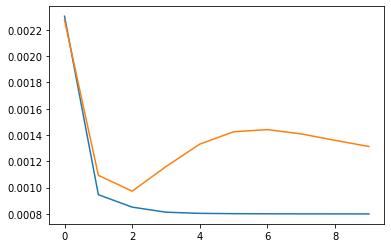

No handles with labels found to put in legend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                15000     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 15,051
Trainable params: 15,051
Non-trainable params: 0
_________________________________________________________________
None


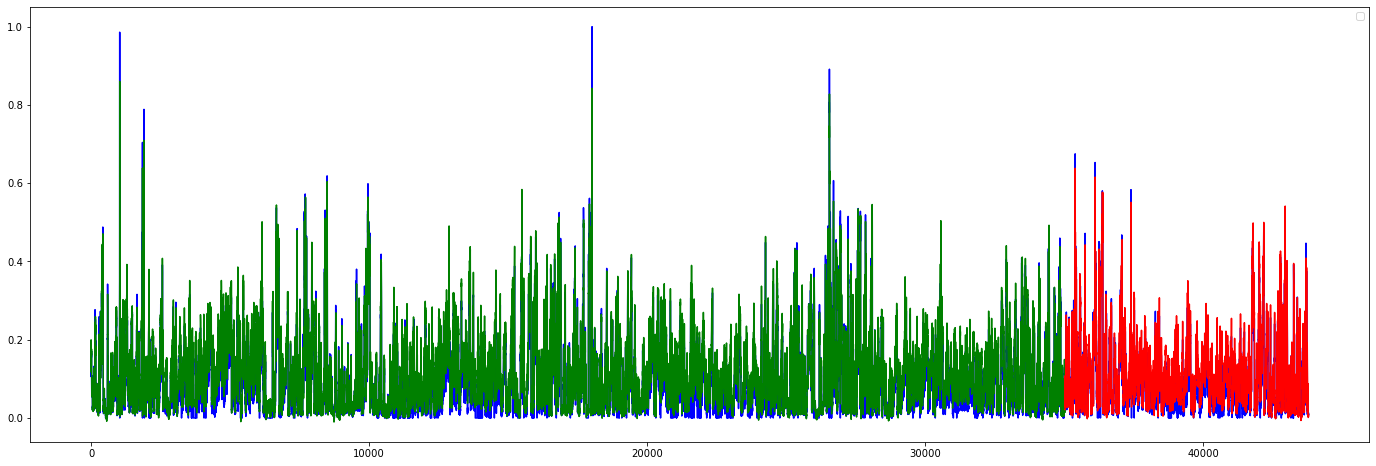

In [18]:
# 呈现原始数据，训练结果，预测结果
def plot_img(source_data_set, train_predict, test_predict):
    plt.figure(figsize=(24, 8))
    # 原始数据蓝色
    plt.plot(source_data_set[:, -1], c='b')
    # 训练数据绿色
    plt.plot([x for x in train_predict], c='g')
    # 预测结果红色
    plt.plot([None for _ in train_predict] + [x for x in test_predict], c='r')
    plt.legend()
    plt.show()
# 模型预测
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# 绘制训练损失和测试损失
plt.plot(history .history['loss'], label='train')
plt.plot(history .history['val_loss'], label='test')
plt.show()
print(model.summary())
# 绘制预测结果与实际结果对比
plot_img(values, train_predict, test_predict)
